# Sobre os dados

Os dados foram retirados do site https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp no dia 17 de outibro de 2023. Eles representam os preços praticados (preço por litro) por revendedores de combustíveis automotivos e de gás liquefeito de petróleo envasilhado em botijões de 13 quilos (GLP P13) durante o período de 11 de setembro (09/11) e 5 de outubro (10/06).

Inportando e fazendo a transformação dos dados:

In [21]:
import pandas as pd

data = pd.read_csv("ultimas-4-semanas-gasolina-etanol.csv",sep=";")
data = pd.DataFrame(data)
data = data[['Regiao - Sigla','Estado - Sigla','Produto','Data da Coleta','Valor de Venda','Bandeira']]

In [22]:
#esta linha faz a substitituiçaõ tratando a coluna como string e depois transforma em float 
#obs: object != string
data['Valor de Venda'] = data['Valor de Venda'].str.replace(',','.').astype(float)
data['Data da Coleta'] = pd.to_datetime(data['Data da Coleta'], format="%d/%m/%Y")
data['Data da Coleta'] = data['Data da Coleta'].dt.strftime("%m/%d")#mes/dia
data.head(10)

,Regiao - Sigla,Estado - Sigla,Produto,Data da Coleta,Valor de Venda,Bandeira
0,SE,SP,GASOLINA,09/12,4.98,BRANCA
1,SE,SP,ETANOL,09/12,2.98,BRANCA
2,N,AC,GASOLINA,09/11,7.48,VIBRA
3,N,AC,GASOLINA,09/11,7.48,IPIRANGA
4,N,AC,GASOLINA ADITIVADA,09/11,7.57,IPIRANGA
5,N,AC,ETANOL,09/11,5.79,IPIRANGA
6,N,AC,GASOLINA,09/13,6.59,VIBRA
7,N,AC,GASOLINA ADITIVADA,09/13,6.59,VIBRA
8,N,AC,ETANOL,09/13,4.69,VIBRA
9,N,AC,GASOLINA,09/13,6.69,VIBRA


# Estatística descritiva

Abaixo temos as estatísticas descritivas dos preços separador por tipo de combustível. Nele podemos ver que, em média, o combustível mais caro é a gasolina aditivada logo em seguida da gasolina e a mais barata é o etanol.

In [23]:
data.groupby('Produto')['Valor de Venda'].describe().sort_values('mean',ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
Produto,,,,,,,,
GASOLINA ADITIVADA,14511.0,6.00,0.38,4.84,5.79,5.99,6.19,8.69
GASOLINA,18419.0,5.83,0.39,4.68,5.59,5.79,5.99,7.62
ETANOL,15583.0,3.94,0.57,2.69,3.49,3.89,4.32,6.60


A região que tem o combustível mais caro é a região Norte, seguido da região Nordente e Sudeste.

In [24]:
#describe por grupo
#data.groupby('variavel categorica')['variavel numerica'].describe()
data.groupby('Regiao - Sigla')['Valor de Venda'].describe().sort_values('mean',ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
Regiao - Sigla,,,,,,,,
N,2946.0,6.06,0.79,3.95,5.69,6.27,6.59,7.62
NE,9638.0,5.53,0.81,3.79,4.78,5.79,6.14,7.29
S,8568.0,5.50,0.82,3.19,5.29,5.79,5.99,6.99
SE,23964.0,5.03,1.09,2.69,3.79,5.49,5.87,8.69
CO,3397.0,5.03,1.09,2.95,3.84,5.59,5.89,6.99


Os estados com o combústivel mais caro, em média, estão concentrados na região Norte do país, com os cinco estados mais caros.

In [25]:
#describe por grupo por estado e região
data.groupby(['Regiao - Sigla','Estado - Sigla'])['Valor de Venda'].describe().sort_values('mean',ascending=False).round(2)

count  mean   std   min   25%   50%   75%  \
Regiao - Sigla Estado - Sigla                                                
N              AC                169.0  6.48  0.91  4.18  6.59  6.65  6.79   
               RO                496.0  6.27  0.59  4.61  6.24  6.57  6.59   
               AM                558.0  6.19  0.94  4.49  4.79  6.59  6.59   
               PA                980.0  6.07  0.73  3.95  5.69  6.19  6.64   
               RR                144.0  5.90  0.31  4.87  5.92  5.99  6.00   
NE             SE                375.0  5.78  0.72  4.29  4.79  5.99  6.29   
               RN                429.0  5.75  0.69  4.09  4.99  6.03  6.28   
N              AP                117.0  5.72  0.19  5.39  5.59  5.64  5.85   
S              RS               3233.0  5.69  0.53  3.89  5.57  5.79  5.99   
NE             CE               1456.0  5.68  0.74  4.09  4.95  5.87  6.35   
N              TO                482.0  5.66  0.82  3.99  4.69  6.08  6.29   
SE             ES               1057.0  5.60  0.84  3.79  5.29  5.79  6.26   
S              SC               2036.0  5.60  0.66  3.85  5.47  5.84  5.99   
NE             MA               1043.0  5.57  0.65  3.99  5.28  5.79  6.08   
               AL                586.0  5.54  0.78  4.09  4.84  5.79  6.09   
               BA               2854.0  5.53  0.89  3.79  4.49  5.94  6.19   
               PE               1718.0  5.41  0.81  3.97  4.49  5.69  5.89   
               PB                635.0  5.34  0.81  3.97  4.44  5.79  5.97   
               PI                542.0  5.31  0.76  3.95  4.39  5.68  5.89   
SE             RJ               3766.0  5.29  0.87  3.59  4.39  5.59  5.99   
S              PR               3299.0  5.25  1.04  3.19  4.14  5.76  6.09   
CO             MS                566.0  5.24  1.12  3.17  4.05  5.54  5.99   
               DF                558.0  5.14  0.94  3.46  3.91  5.65  5.89   
               GO               1710.0  4.97  1.07  2.99  3.87  5.59  5.93   
SE             MG               5320.0  4.96  1.06  3.01  3.69  5.49  5.79   
               SP              13821.0  4.94  1.15  2.69  3.59  5.47  5.79   
CO             MT                563.0  4.87  1.23  2.95  3.39  5.59  5.87   

                                max  
Regiao - Sigla Estado - Sigla        
N              AC              7.57  
               RO              7.09  
               AM              7.62  
               PA              7.07  
               RR              6.25  
NE             SE              6.75  
               RN              6.75  
N              AP              6.21  
S              RS              6.99  
NE             CE              6.99  
N              TO              6.99  
SE             ES              6.99  
S              SC              6.79  
NE             MA              6.99  
               AL              7.07  
               BA              7.29  
               PE              7.06  
               PB              6.98  
               PI              6.45  
SE             RJ              6.93  
S              PR              6.95  
CO             MS              6.99  
               DF              6.39  
               GO              6.89  
SE             MG              6.87  
               SP              8.69  
CO             MT              6.64

# Graficos

Neste gráfico temos o preço médio por dia, o menor preço, durante o periodo de 11 de setembro e 5 de outubro, foi no dia 9 e o maior no dia 29 de setembro.

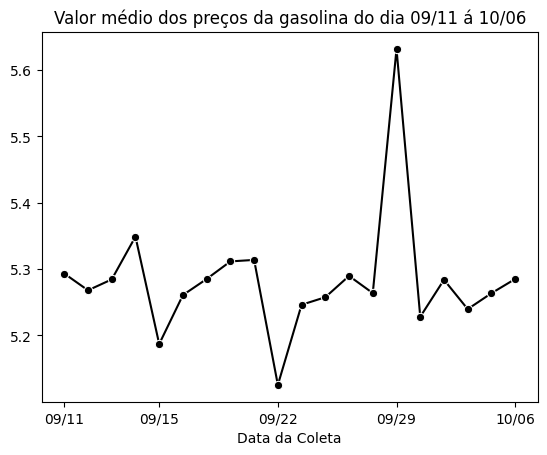

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

datamean = data.groupby(['Data da Coleta'])['Valor de Venda'].mean()
ax = sns.lineplot(x='Data da Coleta',y=datamean.values,data=datamean,
             errorbar=None,marker='o',estimator='mean',color='black')
ax.set_xticks([0,4,9,14,19])
ax.set_title("Valor médio dos preços da gasolina do dia 09/11 á 10/06")
plt.show()

Agora temos os preços divididos por região e tipo de combustível, nele podemos ver que, no mesmo período de tempo, o preço da gasolina e gasolina aditivada foram parecidos e o etanol mais barato que ambos, a região Norte teve o maior preço durante esse período.

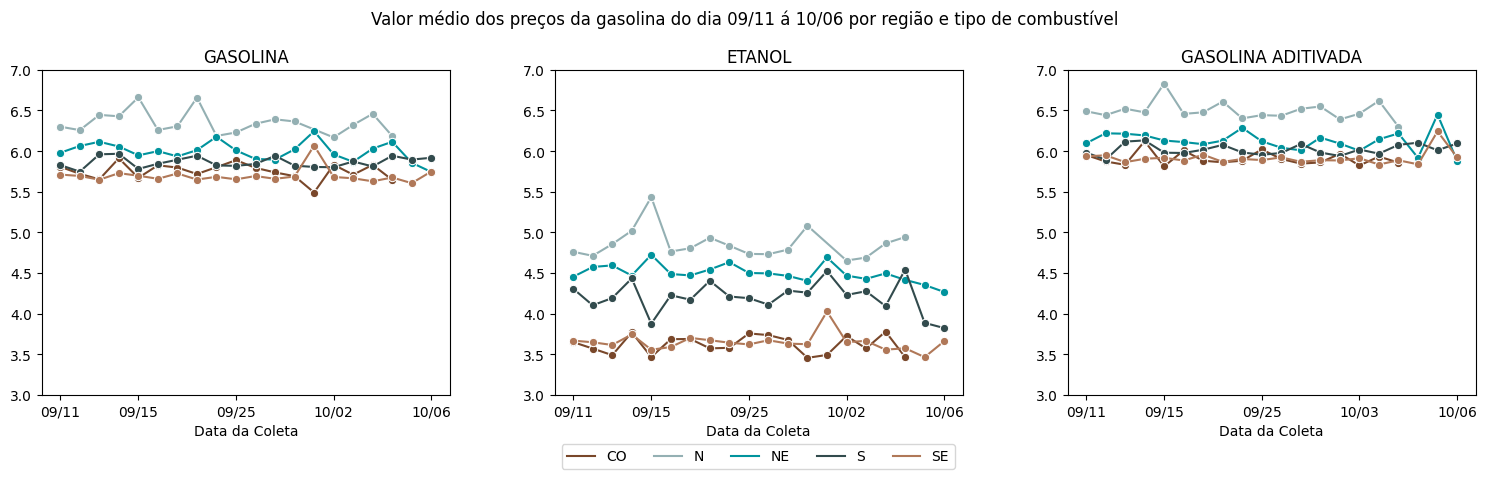

In [27]:
#separar os graficos por combustivel([GASOLINA,ETANOL,ADITIVADA]) e regiao
import matplotlib.pyplot as plt
import seaborn as sns

# Cria um grid de 1x3 figuras
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
region_colors = {'NE': '#00939D', 'S': '#324B4D', 'N': '#94B0B3','SE':'#B07858','CO':'#79472A'}
fuel = ['GASOLINA', 'ETANOL', 'GASOLINA ADITIVADA']

#i esta pegando os indices e ax os graficos ja que o enumerate guarda tando o indice quanto o valor
for i, ax in enumerate(axs):
    fuelData = data[data['Produto'] == fuel[i]]
    fuelData = fuelData.groupby(['Regiao - Sigla','Data da Coleta'])['Valor de Venda'].mean()
    sns.lineplot(x='Data da Coleta', y=fuelData.values, hue='Regiao - Sigla', data=fuelData,
                 errorbar=None, style='Regiao - Sigla', marker='o', dashes=False, ax=ax,
                 palette=region_colors)
    ax.legend(loc='lower left', bbox_to_anchor=(0, -0.25), ncol=5)
    if i != 1:
        ax.get_legend().remove()
    ax.set_ylim(3, 7)
    ax.set_xticks([0,4,9,14,19])
    ax.set_title(f'{fuel[i]}')

fig.suptitle("Valor médio dos preços da gasolina do dia 09/11 á 10/06 por região e tipo de combustível")
plt.tight_layout()
plt.show()

O gráfico de densidade de preços mostra que os preços, em todas as regiões, é maioria em torno de 6 reais por litro.

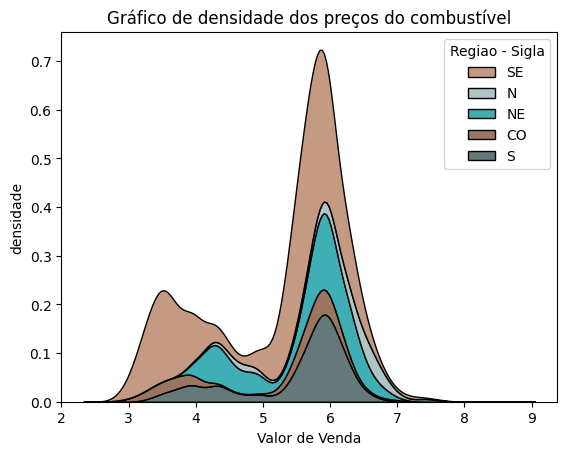

In [28]:
ax = sns.kdeplot(x = 'Valor de Venda',hue = 'Regiao - Sigla',data=data,
            palette=region_colors,multiple="stack")
ax.set_title("Gráfico de densidade dos preços do combustível")
ax.set_ylabel("densidade")
plt.show()

No histograma também e possível ver que a maior frequência é perto dos 6 reais, mas também que a frequência caiu drasticamente nos valores acima de 6 reais, isso pode dizer que os revendedores evitam colocar o preço acima de 5.99 por litro.

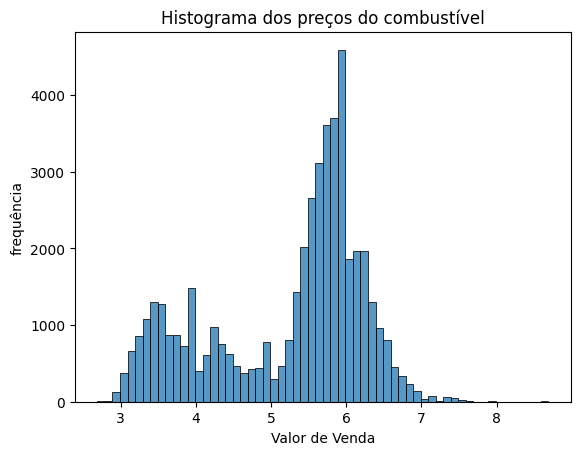

In [29]:
ax=sns.histplot(x = 'Valor de Venda',data=data,
                binwidth =0.1)
ax.set_title("Histograma dos preços do combustível")
ax.set_ylabel("frequência")
plt.show()